# World Health Organization 
## Global Health Observatory data repository 
(http://www.who.int/gho/en/)

By category > Public health and environment > Water, sanitation and hygiene

(http://apps.who.int/gho/data/node.main.167?lang=en)

In [86]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
from datetime import datetime

# Exposure (access to water and sanitation)
Data Cleansing

In [2]:
# Get Exposure Data by country
df_exp = pd.read_csv("http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/WHS5_122,WHS5_158&profile=crosstable&filter=COUNTRY:*;RESIDENCEAREATYPE:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;RESIDENCEAREATYPE&x-collapse=true")

In [3]:
df_exp.head()

,Country; Year,Population using improved drinking-water sources (%); Rural,Population using improved drinking-water sources (%); Urban,Population using improved drinking-water sources (%); Total,Population using improved sanitation facilities (%); Rural,Population using improved sanitation facilities (%); Urban,Population using improved sanitation facilities (%); Total
0,Afghanistan; 2015,47.0,78.2,55.3,27.0,45.1,31.9
1,Afghanistan; 2000,24.3,52.2,30.3,21.3,31.2,23.4
2,Albania; 2015,95.2,94.9,95.1,90.2,95.5,93.2
3,Albania; 2000,93.3,100.0,96.1,75.2,94.8,83.4
4,Albania; 1990,NaN,100.0,NaN,68.7,94.5,78.1


In [4]:
# Update Column names so they're easier to work with
df_exp.columns = ["Country; Year", "IWRuralPct","IWUrbanPct","IWPct", "ISRuralPct", "ISUrbanPct", "ISPct"]
df_exp.head()

,Country; Year,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct
0,Afghanistan; 2015,47.0,78.2,55.3,27.0,45.1,31.9
1,Afghanistan; 2000,24.3,52.2,30.3,21.3,31.2,23.4
2,Albania; 2015,95.2,94.9,95.1,90.2,95.5,93.2
3,Albania; 2000,93.3,100.0,96.1,75.2,94.8,83.4
4,Albania; 1990,NaN,100.0,NaN,68.7,94.5,78.1


In [5]:
# Seperating Country from Year in initial cell to 2 separate cells
df_exp['Country'], df_exp['Year'] = zip(*df_exp['Country; Year'].apply(lambda x: x.split('; ',1)))
df_exp['Year'] = pd.to_datetime(df_exp['Year'], format='%Y')
df_exp.drop(['Country; Year'], inplace=True, axis=1)
df_exp.head()

,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct,Country,Year
0,47.0,78.2,55.3,27.0,45.1,31.9,Afghanistan,2015-01-01
1,24.3,52.2,30.3,21.3,31.2,23.4,Afghanistan,2000-01-01
2,95.2,94.9,95.1,90.2,95.5,93.2,Albania,2015-01-01
3,93.3,100.0,96.1,75.2,94.8,83.4,Albania,2000-01-01
4,NaN,100.0,NaN,68.7,94.5,78.1,Albania,1990-01-01


In [6]:
df_exp.dtypes

IWRuralPct           float64
IWUrbanPct           float64
IWPct                float64
ISRuralPct           float64
ISUrbanPct           float64
ISPct                float64
Country               object
Year          datetime64[ns]
dtype: object

# Exposure (access to water & sanitation)
Initial Analysis

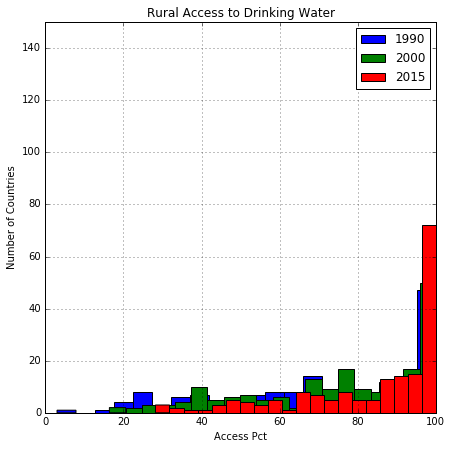

In [35]:
# Histograms by year for Rural access to water
df_exp[df_exp.Year=='1990'].IWRuralPct.plot(figsize=(7,7), kind="hist", bins=20, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].IWRuralPct.plot(kind="hist", bins=20, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].IWRuralPct.plot(kind="hist", bins=20, label="2015", grid=True)
pyplot.title("Rural Access to Drinking Water")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

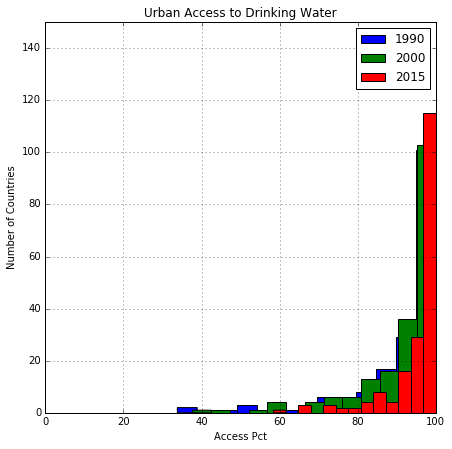

In [51]:
# Histograms by year for Urban access to water
df_exp[df_exp.Year=='1990'].IWUrbanPct.plot(figsize=(7,7), kind="hist", bins=13, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].IWUrbanPct.plot(kind="hist", bins=13, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].IWUrbanPct.plot(kind="hist", bins=13, label="2015", grid=True)
pyplot.title("Urban Access to Drinking Water")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

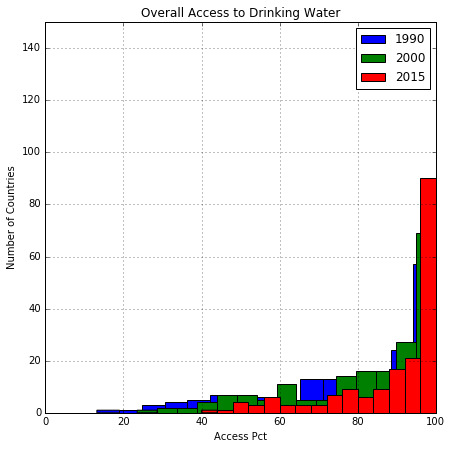

In [52]:
# Histograms by year for Overall access to water
df_exp[df_exp.Year=='1990'].IWPct.plot(figsize=(7,7), kind="hist", bins=15, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].IWPct.plot(kind="hist", bins=15, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].IWPct.plot(kind="hist", bins=15, label="2015", grid=True)
pyplot.title("Overall Access to Drinking Water")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

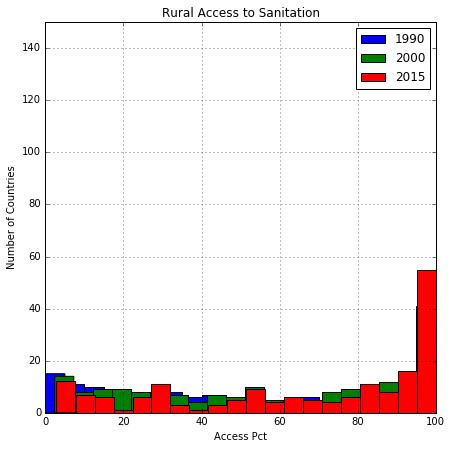

In [54]:
# Histograms by year for Rural access to sanitation
df_exp[df_exp.Year=='1990'].ISRuralPct.plot(figsize=(7,7), kind="hist", bins=20, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].ISRuralPct.plot(kind="hist", bins=20, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].ISRuralPct.plot(kind="hist", bins=20, label="2015", grid=True)
pyplot.title("Rural Access to Sanitation")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

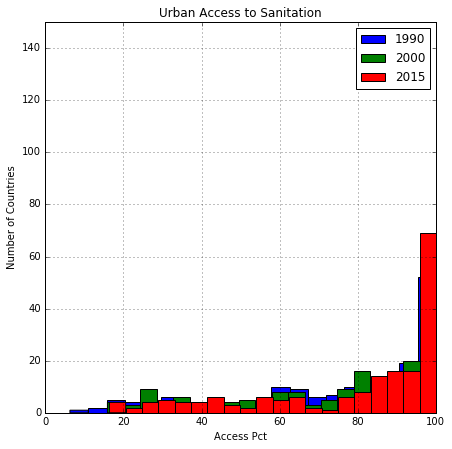

In [55]:
# Histograms by year for Urban access to sanitation
df_exp[df_exp.Year=='1990'].ISUrbanPct.plot(figsize=(7,7), kind="hist", bins=20, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].ISUrbanPct.plot(kind="hist", bins=20, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].ISUrbanPct.plot(kind="hist", bins=20, label="2015", grid=True)
pyplot.title("Urban Access to Sanitation")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

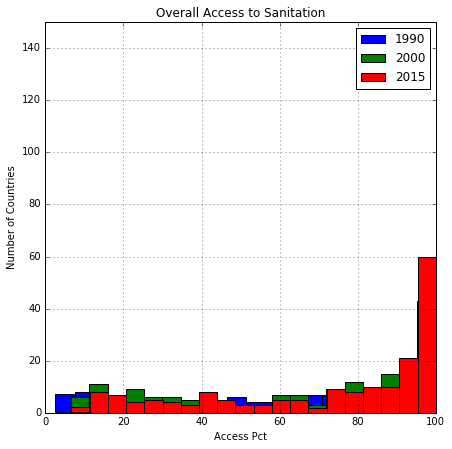

In [56]:
# Histograms by year for total access to sanitation
df_exp[df_exp.Year=='1990'].ISPct.plot(figsize=(7,7), kind="hist", bins=20, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].ISPct.plot(kind="hist", bins=20, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].ISPct.plot(kind="hist", bins=20, label="2015", grid=True)
pyplot.title("Overall Access to Sanitation")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

In [47]:
# Number of countries
len(df_exp.Country.unique())

192

In [50]:
exp_by_country = df_exp.groupby('Country')
exp_by_country.describe()

ISPct  ISRuralPct  ISUrbanPct       IWPct  IWRuralPct  \
Country                                                                         
Afghanistan count    2.000000    2.000000    2.000000    2.000000    2.000000   
            mean    27.650000   24.150000   38.150000   42.800000   35.650000   
            std      6.010408    4.030509    9.828784   17.677670   16.051324   
            min     23.400000   21.300000   31.200000   30.300000   24.300000   
            25%     25.525000   22.725000   34.675000   36.550000   29.975000   
            50%     27.650000   24.150000   38.150000   42.800000   35.650000   
            75%     29.775000   25.575000   41.625000   49.050000   41.325000   
            max     31.900000   27.000000   45.100000   55.300000   47.000000   
Albania     count    3.000000    3.000000    3.000000    2.000000    2.000000   
            mean    84.900000   78.033333   94.933333   95.600000   94.250000   
            std      7.660940   11.026483    0.513160    0.707107    1.343503   
            min     78.100000   68.700000   94.500000   95.100000   93.300000   
            25%     80.750000   71.950000   94.650000   95.350000   93.775000   
            50%     83.400000   75.200000   94.800000   95.600000   94.250000   
            75%     88.300000   82.700000   95.150000   95.850000   94.725000   
            max     93.200000   90.200000   95.500000   96.100000   95.200000   
Algeria     count    3.000000    3.000000    3.000000    3.000000    3.000000   
            mean    83.833333   74.066667   90.933333   88.200000   83.600000   
            std      3.655589    7.409678    1.026320    4.107311    1.637071   
            min     80.300000   67.700000   89.800000   83.600000   81.800000   
            25%     81.950000   70.000000   90.500000   86.550000   82.900000   
            50%     83.600000   72.300000   91.200000   89.500000   84.000000   
            75%     85.600000   77.250000   91.500000   90.500000   84.500000   
            max     87.600000   82.200000   91.800000   91.500000   85.000000   
Andorra     count    3.000000    3.000000    3.000000    3.000000    3.000000   
            mean   100.000000  100.000000  100.000000  100.000000  100.000000   
            std      0.000000    0.000000    0.000000    0.000000    0.000000   
            min    100.000000  100.000000  100.000000  100.000000  100.000000   
            25%    100.000000  100.000000  100.000000  100.000000  100.000000   
            50%    100.000000  100.000000  100.000000  100.000000  100.000000   
...                       ...         ...         ...         ...         ...   
Viet Nam    std     21.040200   20.536877   14.848008   17.522081   20.735557   
            min     36.200000   28.900000   64.900000   62.700000   55.700000   
            25%     44.550000   37.050000   70.800000   70.050000   63.950000   
            50%     52.900000   45.200000   76.700000   77.400000   72.200000   
            75%     65.450000   57.450000   85.550000   87.500000   84.550000   
            max     78.000000   69.700000   94.400000   97.600000   96.900000   
Yemen       count    2.000000    2.000000    2.000000    2.000000    2.000000   
            mean    31.550000   17.800000   76.100000   63.100000   55.200000   
            std     11.101576    8.909545    8.909545    4.525483    4.666905   
            min     23.700000   11.500000   69.800000   59.900000   51.900000   
            25%     27.625000   14.650000   72.950000   61.500000   53.550000   
            50%     31.550000   17.800000   76.100000   63.100000   55.200000   
            75%     35.475000   20.950000   79.250000   64.700000   56.850000   
            max     39.400000   24.100000   82.400000   66.300000   58.500000   
Zambia      count    3.000000    3.000000    3.000000    3.000000    3.000000   
            mean    41.700000   31.933333   57.366667   55.866667   36.533333   
            std      1.905256    3.569781    1.662328  

In [55]:
# Countries with lowest combined rural access to water & sanitation
exp_by_country.mean()[(exp_by_country.IWRuralPct.mean() + exp_by_country.ISRuralPct.mean()) < 50]

,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct
Country,,,,,,
Chad,40.900000,60.266667,45.100000,5.400000,26.000000,9.866667
Congo,36.050000,95.466667,72.850000,5.600000,18.850000,13.850000
Democratic Republic of the Congo,27.566667,84.133333,47.700000,20.666667,29.333333,23.533333
Ethiopia,23.500000,87.966667,33.133333,11.433333,23.500000,13.066667
Madagascar,25.266667,76.166667,39.666667,8.100000,16.566667,10.566667
Mozambique,29.033333,75.866667,42.433333,5.666667,37.900000,14.966667
Niger,38.133333,79.700000,45.200000,2.800000,27.866667,7.133333
Papua New Guinea,28.066667,87.600000,36.300000,13.066667,59.300000,19.433333
Sierra Leone,33.133333,76.800000,48.833333,5.633333,22.066667,11.566667


In [59]:
# Countries with highest combined rural access to water & sanitation
exp_by_country.mean()[(exp_by_country.IWRuralPct.mean() + exp_by_country.ISRuralPct.mean()) > 190]

,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct
Country,,,,,,
Andorra,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Australia,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Austria,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Bahrain,97.933333,97.933333,97.933333,99.100000,99.100000,99.100000
Belarus,99.033333,99.766667,99.566667,96.566667,93.966667,94.733333
Belgium,100.000000,100.000000,100.000000,99.466667,99.500000,99.500000
Canada,99.000000,100.000000,99.800000,99.000000,100.000000,99.800000
Cook Islands,99.900000,99.900000,99.900000,94.850000,94.850000,94.850000
Croatia,97.433333,99.733333,98.700000,96.066667,98.066667,97.200000


# Life Expectancy

In [62]:
df_le = pd.read_csv("LifeExpectancy.csv") #various life expectancy measures
df_le.columns = ["Country; Year", "LEatBirth", "LEatBirthFem", "LEatBirthMale","LEat60", "LEat60Female", "LEat60Male","HALEatBirth","HALEatBirthFemale", "HALEatBirthMale"]
# Seperating Country from Year in initial cell to 2 separate cells
df_le['Country'], df_le['Year'] = zip(*df_le['Country; Year'].apply(lambda x: x.split('; ', 1)))
#convert year into date format
df_le['Year'] = pd.to_datetime(df_le['Year'], format='%Y')

In [63]:
# function to use on number fields that contain multiple answers, in order to update number fields appropriately
# data is at year level, so ints can be used (vs floats)
def clean_le(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return int(value[0:2])

In [64]:
#used to convert to float, but check for NaN values first
def clean_float(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return float(value)

In [65]:
#Clean up healthy life expectancy at birth, life expectancy at birth and at 60
df_le['HALEatBirth'] = df_le['HALEatBirth'].apply(clean_le) 

In [66]:
##****************Updated
df_le_clean = pd.DataFrame({'Country': df_le.Country, 'Year': df_le.Year, "LEatBirth": df_le.LEatBirth, 
                            "LEat60": df_le.LEat60, "LEat60-Adj": df_le.LEat60 + 60,  "HALEatBirth": df_le.HALEatBirth})

In [67]:
df_le_clean.head()

,Country,HALEatBirth,LEat60,LEat60-Adj,LEatBirth,Year
0,Afghanistan,50.0,16,76,61,2013-01-01
1,Afghanistan,49.0,16,76,60,2012-01-01
2,Afghanistan,45.0,15,75,55,2000-01-01
3,Afghanistan,NaN,14,74,49,1990-01-01
4,Albania,65.0,19,79,74,2013-01-01


In [89]:
def push2015(value):
    if value == datetime.strptime('2013','%Y'):
        return datetime.strptime('2015','%Y')
    else:
        return value

In [92]:
df_le_clean['Year'] = df_le_clean['Year'].apply(push2015)

In [103]:
df_le_clean = df_le_clean[df_le_clean.Year != '2012']

In [104]:
df_le_exp = pd.merge(df_le_clean, df_exp)

In [130]:
df3 = df_le_exp['Country'].groupby(df_le_exp['Country']).count()

In [131]:
df3 = df3.to_frame()
df3.columns = ['Count']

In [133]:
df3.reset_index(level=0, inplace=True)

In [135]:
df3 = df3[df3.Count == 3]

In [143]:
df3_le_exp = pd.merge(df_le_exp, df3)

In [144]:
df3_le_exp.head()

,Country,HALEatBirth,LEat60,LEat60-Adj,LEatBirth,Year,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct,Count
0,Albania,65.0,19,79,74,2015-01-01,95.2,94.9,95.1,90.2,95.5,93.2,3
1,Albania,62.0,17,77,70,2000-01-01,93.3,100.0,96.1,75.2,94.8,83.4,3
2,Albania,NaN,16,76,69,1990-01-01,NaN,100.0,NaN,68.7,94.5,78.1,3
3,Algeria,62.0,18,78,72,2015-01-01,81.8,84.3,83.6,82.2,89.8,87.6,3
4,Algeria,60.0,18,78,70,2000-01-01,84.0,93.2,89.5,72.3,91.2,83.6,3


In [145]:
df3_le_exp_corr = df3_le_exp.corr()

In [148]:
df3_le_exp_corr = df3_le_exp_corr[['IWRuralPct','IWUrbanPct','IWPct','ISRuralPct','ISUrbanPct','ISPct']]

In [150]:
df3_le_exp_corr.loc[:'LEatBirth']

,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct
HALEatBirth,0.778963,0.630919,0.803787,0.831852,0.844142,0.861756
LEat60,0.595615,0.514409,0.634142,0.654427,0.638081,0.679017
LEat60-Adj,0.595615,0.514409,0.634142,0.654427,0.638081,0.679017
LEatBirth,0.772890,0.638578,0.811423,0.820131,0.834542,0.856440
